# Representing images as tensors/blobs

Deep Learning models for computer vision usually get images as an input. However, they do not operate with images, but with tensors. A tensor is more general than an image; it's not limited by two-spatial and one-channel dimensions. In this recipe, we will learn how to convert an image to a multidimensional tensor.

As you know, matrices and images in the OpenCV Python package are presented with NumPy arrays. For example, `cv2.imread` in the previous code gives a colorful image, which is a three-dimensional array, where all three dimensions correspond to **height**, **width**, and **channels**, respectively. It can be imagined as a two-dimensional matrix with height by width elements, and each element stores three values for each red, green, and blue channel. This order of dimensions can be encoded as the letters **height, width, channels (HWC)**, and data along the channels dimension is stored in the order blue, green, red.

Tensors are multidimensional matrices. Many Deep Learning models accept four-dimensional floating point tensors three for height, width, and channels; and an extra one. Usually the models process not one image but many in a single pass. This bunch of images is called a batch and the fourth dimension addresses individual images in the batch.

The OpenCV Deep Learning functionality operates four-dimensional floating-point tensors with an **NCHW** order of dimensions: $N$ for the number of images in the batch, $C$ for the number of channels, and $H$ and $W$ are for the height and width, respectively.

So, to turn an image into a tensor, we need to perform the following steps:

1. Convert the image to a floating-point 
2. Change the **BGR** order of channels to **RGB** if necessary 
3. Turn the **HWC** image to a **CHW** tensor 
4. Add a new dimension into the **CHW** tensor to make it an **NCHW** one

As you can see, it's easy. But each step is very important and omitting only one can result in many hours of debugging, where you're trying to understand and locate a mistake. For example, why and when do we need to reorder BGR images? The answer is connected with the order of channels which has been used during the model training. If the model is used to handle **RGB** images, it is highly likely it will perform poorly on BGR images. This small missed detail may cost you a lot of your time.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S05\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s05\env

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S05\env


------  ../data/Lena.png---------    Shape(512, 512, 3) Lena: uint8
[[ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] ]
[[130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] ]


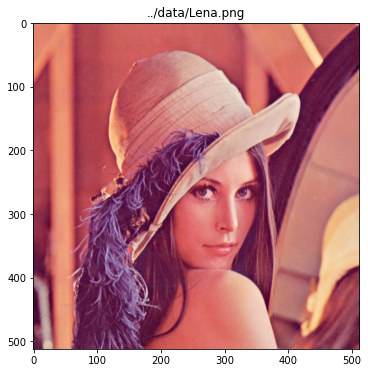

In [2]:
image_bgR_int = cv2.imread('../data/Lena.png', cv2.IMREAD_COLOR)



###################################################################
print_image('../data/Lena.png','Lena',image_bgR_int,44,46,221,228)
plt_view_image(plt,[["../data/Lena.png",image_bgR_int[:,:,[2,1,0]] ]],figsize=(15,6),axis='on',cmap='gray')

------  ../data/Lena.png---------    Shape(512, 512, 3) image_bgR_int: uint8
[[ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] ]
[[130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] ]
------  BGR !! float-------------    Shape(512, 512, 3) image_bgR_float: float32
[[ 96.  88. 196.] [109.  98. 194.] [138. 121. 198.] [134. 118. 196.] [105. 100. 193.] [105.  99. 194.] [132. 117. 188.] ]
[[130. 121. 194.] [167. 157. 200.] [158. 165. 207.] [122. 133. 206.] [127. 118. 200.] [169. 152. 200.] [173. 168. 205.] ]


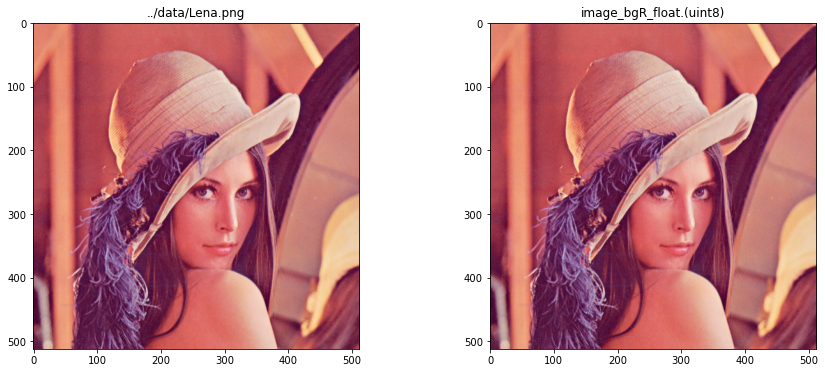

In [3]:
image_bgR_float = image_bgR_int.astype(np.float32)



###################################################################
print_image('../data/Lena.png','image_bgR_int',image_bgR_int,44,46,221,228)
print_image('BGR !! float','image_bgR_float',image_bgR_float,44,46,221,228)
plt_view_image(plt,[["../data/Lena.png",image_bgR_int[:,:,[2,1,0]] ],
                    ["image_bgR_float.(uint8)",image_bgR_float.astype(np.uint8)[:,:,[2,1,0]]]
                   ],
               figsize=(15,6),axis='on',cmap='gray')

------  ../data/Lena.png---------    Shape(512, 512, 3) image_bgR_int: uint8
[[ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] ]
[[130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] ]
------  BGR !! float-------------    Shape(512, 512, 3) image_bgR_float: float32
[[ 96.  88. 196.] [109.  98. 194.] [138. 121. 198.] [134. 118. 196.] [105. 100. 193.] [105.  99. 194.] [132. 117. 188.] ]
[[130. 121. 194.] [167. 157. 200.] [158. 165. 207.] [122. 133. 206.] [127. 118. 200.] [169. 152. 200.] [173. 168. 205.] ]
------  RGB-norm float-----------    Shape(512, 512, 3) image_Rgb_float: float32
[[196.  88.  96.] [194.  98. 109.] [198. 121. 138.] [196. 118. 134.] [193. 100. 105.] [194.  99. 105.] [188. 117. 132.] ]
[[194. 121. 130.] [200. 157. 167.] [207. 165. 158.] [206. 133. 122.] [200. 118. 127.] [200. 152. 169.] [205. 168. 173.] ]


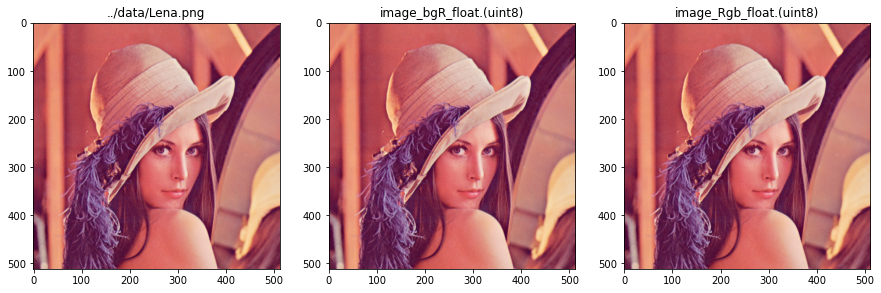

In [4]:
image_Rgb_float = image_bgR_float[..., ::-1]



###################################################################
print_image('../data/Lena.png','image_bgR_int',image_bgR_int,44,46,221,228)
print_image('BGR !! float','image_bgR_float',image_bgR_float,44,46,221,228)
print_image('RGB-norm float','image_Rgb_float',image_Rgb_float,44,46,221,228)
plt_view_image(plt,[["../data/Lena.png",image_bgR_int[:,:,[2,1,0]] ],
                    ["image_bgR_float.(uint8)",image_bgR_float.astype(np.uint8)[:,:,[2,1,0]]],
                    ["image_Rgb_float.(uint8)",image_Rgb_float.astype(np.uint8)]
                   ],
               figsize=(15,6),axis='on',cmap='gray')

cv2.imshow('image bgR int, image_bgR_float.astype(np.uint8) image_Rgb_float.astype(np.uint8)', 
           np.hstack([image_bgR_int, image_bgR_float.astype(np.uint8),image_Rgb_float.astype(np.uint8)]))
cv2.waitKey()
cv2.destroyAllWindows()

------  ../data/Lena.png---------    Shape(512, 512, 3) image_bgR_int: uint8
[[ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] ]
[[130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] ]
------  BGR !! float-------------    Shape(512, 512, 3) image_bgR_float: float32
[[ 96.  88. 196.] [109.  98. 194.] [138. 121. 198.] [134. 118. 196.] [105. 100. 193.] [105.  99. 194.] [132. 117. 188.] ]
[[130. 121. 194.] [167. 157. 200.] [158. 165. 207.] [122. 133. 206.] [127. 118. 200.] [169. 152. 200.] [173. 168. 205.] ]
------  RGB-norm float-----------    Shape(512, 512, 3) image_Rgb_float: float32
[[196.  88.  96.] [194.  98. 109.] [198. 121. 138.] [196. 118. 134.] [193. 100. 105.] [194.  99. 105.] [188. 117. 132.] ]
[[194. 121. 130.] [200. 157. 167.] [207. 165. 158.] [206. 133. 122.] [200. 118. 127.] [200. 152. 169.] [205. 168. 173.] ]
------  tensor_chw---------------    Shape(3, 512, 512) tensor_chw: flo

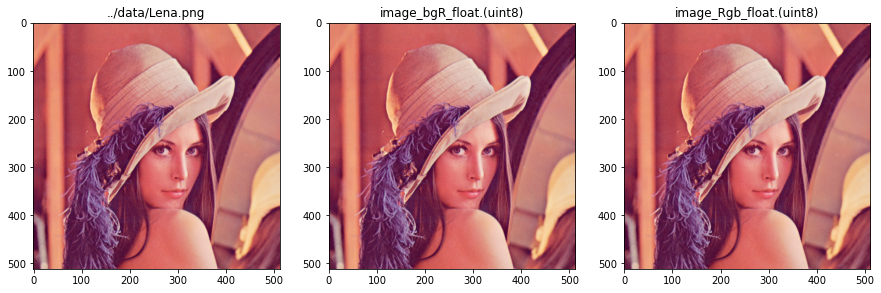

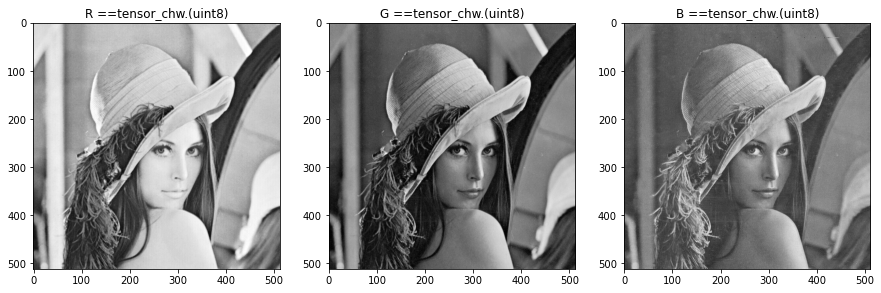

In [5]:
tensor_chw = np.transpose(image_Rgb_float, (2, 0, 1))



###################################################################
print_image('../data/Lena.png','image_bgR_int',image_bgR_int,44,46,221,228)
print_image('BGR !! float','image_bgR_float',image_bgR_float,44,46,221,228)
print_image('RGB-norm float','image_Rgb_float',image_Rgb_float,44,46,221,228)
print_image('tensor_chw','tensor_chw',tensor_chw,0,3,44,46,221,228)

plt_view_image(plt,[["../data/Lena.png",image_bgR_int[:,:,[2,1,0]] ],
                    ["image_bgR_float.(uint8)",image_bgR_float.astype(np.uint8)[:,:,[2,1,0]]],
                    ["image_Rgb_float.(uint8)",image_Rgb_float.astype(np.uint8)]
                   ],
               figsize=(15,6),axis='on',cmap='gray')
plt_view_image(plt,[["R ==tensor_chw.(uint8)",tensor_chw.astype(np.uint8)[0,:,:]],
                    ["G ==tensor_chw.(uint8)",tensor_chw.astype(np.uint8)[1,:,:]],
                    ["B ==tensor_chw.(uint8)",tensor_chw.astype(np.uint8)[2,:,:]]
                   ],
               figsize=(15,6),axis='on',cmap='gray')

In [6]:
# https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
#a = [2,0,1,8]
#print(a, a.shape)
#----> 2 print(a, a.shape)
#AttributeError: 'list' object has no attribute 'shape'

A = np.array([2,0,1,8])
print(A, A.shape)

RowVector = A[np.newaxis,:]
print("RowVector ==",RowVector, RowVector.shape)

ColumnVector =  A[:,np.newaxis]
print(ColumnVector, ColumnVector.shape)

[2 0 1 8] (4,)
RowVector == [[2 0 1 8]] (1, 4)
[[2]
 [0]
 [1]
 [8]] (4, 1)


In [7]:
x1 = np.array([1, 2, 3, 4, 5])
print("x1 ==",x1, x1.shape)

x2 = np.array([1, 0, -1])
print("x2 ==",x2, x2.shape)

#x1_new = x1[:, np.newaxis]    # x1[:, None]
x1_new = x1[:, None]

print("x1_new ==\n",x1_new, x1_new.shape)
# now, the shape of x1_new is (5, 1)
# array([[1],
#        [2],
#        [3],
#        [4],
#        [5]])

print(x1_new + x2)

x1 == [1 2 3 4 5] (5,)
x2 == [ 1  0 -1] (3,)
x1_new ==
 [[1]
 [2]
 [3]
 [4]
 [5]] (5, 1)
[[2 1 0]
 [3 2 1]
 [4 3 2]
 [5 4 3]
 [6 5 4]]


In [8]:
print("x1 ==",x1, x1.shape)
print("x2 ==",x2, x2.shape)

x2_new = x2[:, np.newaxis]    # x2[:, None]
print("x2_new ==\n",x2_new, x2_new.shape)

print(x1 + x2_new)

x1 == [1 2 3 4 5] (5,)
x2 == [ 1  0 -1] (3,)
x2_new ==
 [[ 1]
 [ 0]
 [-1]] (3, 1)
[[2 3 4 5 6]
 [1 2 3 4 5]
 [0 1 2 3 4]]


tensor_nchw.shape == (1, 3, 512, 512)
1 3 512
------  ../data/Lena.png---------    Shape(512, 512, 3) image_bgR_int: uint8
[[ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] ]
[[130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] ]
------  BGR !! float-------------    Shape(512, 512, 3) image_bgR_float: float32
[[ 96.  88. 196.] [109.  98. 194.] [138. 121. 198.] [134. 118. 196.] [105. 100. 193.] [105.  99. 194.] [132. 117. 188.] ]
[[130. 121. 194.] [167. 157. 200.] [158. 165. 207.] [122. 133. 206.] [127. 118. 200.] [169. 152. 200.] [173. 168. 205.] ]
------  RGB-norm float-----------    Shape(512, 512, 3) image_Rgb_float: float32
[[196.  88.  96.] [194.  98. 109.] [198. 121. 138.] [196. 118. 134.] [193. 100. 105.] [194.  99. 105.] [188. 117. 132.] ]
[[194. 121. 130.] [200. 157. 167.] [207. 165. 158.] [206. 133. 122.] [200. 118. 127.] [200. 152. 169.] [205. 168. 173.] ]
------  tensor_chw-------

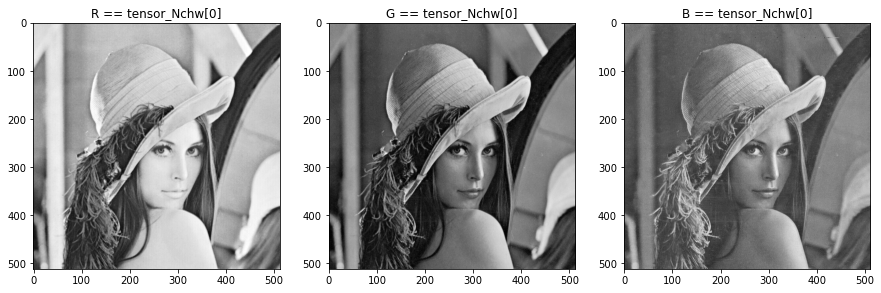

In [9]:
tensor_Nchw = tensor_chw[np.newaxis, ...]

print("tensor_nchw.shape ==",tensor_Nchw.shape)
print(tensor_Nchw.shape[0],tensor_Nchw.shape[1],tensor_Nchw.shape[2])



###################################################################
print_image('../data/Lena.png','image_bgR_int',image_bgR_int,44,46,221,228)
print_image('BGR !! float','image_bgR_float',image_bgR_float,44,46,221,228)
print_image('RGB-norm float','image_Rgb_float',image_Rgb_float,44,46,221,228)
print_image('tensor_chw','tensor_chw',tensor_chw,0,3,44,46,221,228)
print_image('tensor_Nchw[0]','tensor_Nchw[0]',tensor_Nchw[0],0,3,44,46,221,228)

plt_view_image(plt,[["R == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[0,:,:]],
                    ["G == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[1,:,:]],
                    ["B == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[2,:,:]]
                   ],
               figsize=(15,6),axis='on',cmap='gray')